## Bacterial Chemotaxis

A simple model of bacterial chemotaxis was presented in [Kollmann et al. (2005), Nature](https://doi.org/10.1038/nature04228). The model simulates the phosphorylation of the CheY protein in dependence on an external ligand concentration. The phosphorylation status of CheY determines the direction of the flagellar motor, and thus wether the bacterium is in 'swimming' or 'tumbling' mode. 

A key feature of the model (and the biological system) is its perfect adaptability. For constant ligand concentration, the CheY protein always reaches the same steady-state phosphorylation state. This is important, because changes in the motion should only be triggered upon changes in concentration. This remarkable feature leads to the ability to swim on average in the direction of nutrient gradient.

The model contains three variables:

$T_M$: the methylated receptor molecules
$A_p$: the phosphorylated Che-A proteins
$Y_p$: the phosphorylated Che-Y proteins

A particular feature is that the activity of the receptor (activating Che-A) is dependent on the ligand concentration. This means that the receptor becomes less sensitive if ligand concentration is high. This active fraction $T_A$ is calculated as

$T_A = p(L)T_M$ with $p(L) = V\left(1-\frac{L^H}{L^H+K^H}\right),$

where $L$ is the ligand concentration and $V$, $K$ and $H$ some constants.

Only the active form $T_A$ of the receptor is i) subject to deactivation and ii) activating Che-A.

The dynamics of the signalling cascade is described by the following system of differential equations:

$\frac{dT_M}{dt}=k_R R-k_B B^T\frac{T_A}{K_B+T_A}\\
\frac{dAp}{dt}=k_AT_A(A^T-Ap)-k_YAp(Y^T-Yp)\\
\frac{dYp}{dt}=k_YAp(Y^T-Yp)-\gamma_YYp.$
    
For the tutorial, use the following parameters:

$K=V=1$mM, and $H=1.2$.

Use the following concentrations (in $\mu\text{M}$): $R=0.16$, $A^T=5.3$, $B^T=0.28$, $Y^T=9.7$ and the rate
constants $k_R=0.5$, $k_B=16$, $k_A=50$, $k_Y=100$ (in $\mu\text{M}^{-1}\text{s}^{-1}$) and
$\gamma_Y=25\text{s}^{-1}$ and the Michaelis constant $K_B=16\mu\text{M}$.
Explore various time courses for the ligand concentration, e.g.

$ L(t)=\left\{
    \begin{array}{c@{\hspace{1em}}l}
      1 & 100<t<200\\
      0 & \text{else}
    \end{array}
  \right.
$

and plot the concentration of phosphorylated CheY ($Yp$) as a function of
time.


In [1]:
"""
Import modelbase and useful modules
"""

import modelbase
import numpy as np
import matplotlib.pyplot as plt

Could not load modelbase.assimulate. Sundials support disabled.


In [2]:
"""
Define model parameters as dictionary and chemical species as list
"""

par = {'K': 1,
       'V': 1,
       'H': 1.2,
       'R': 0.16,
       'AT': 5.3,
       'BT': 0.28,
       'YT': 9.7,
       'kR': 0.5,
       'kB': 16,
       'kA': 50,
       'kY': 100,
       'gammaY': 25,
       'KB': 16,
       'L': 0,
      }

cpd_list = ['TM','Ap','Yp']

In [3]:
"""
Instatiate modelbase object, called 'm'
"""

m = modelbase.Model(par)

In [4]:
"""
Define the compound names
"""

m.set_cpds(cpd_list)

In [5]:
"""
Define the active receptors TA as an algebraic module:
TA is derived from TM and the parameter L (and some others), but is used at various occurences. 
So it is useful to have access to this dependent variable.
"""

def TA(par,y):
    L = par.L
    H = par.H
    p = par.V * (1 - L**H / (L**H + par.K**H))
    return np.array([p * y[0]])

m.add_algebraicModule(TA,'TA',['TM'],['TA'])


In [6]:
"""
Now define all processes involved in the model:
- Receptor methylation and demethylation ('meth' and 'demeth')
- Activation of Che-A ('actA')
- Conversion of Che-Ap into Che-Yp (a phosphate group is transferred - 'actY')
- Deactivation of Che-Y ('deactY')
"""


m.add_reaction('meth', lambda p:p.kR * p.R, {'TM':1})

def demeth(par,TA):
    return par.kB * par.BT * TA/(par.KB + TA)

m.add_reaction('demeth', demeth, {'TM':-1}, 'TA')

def actA(par,TA,Ap):
    return par.kA * TA * (par.AT - Ap)

m.add_reaction('actA', actA, {'Ap':1}, 'TA', 'Ap')

def actY(par,Ap,Yp):
    return par.kY * Ap * (par.YT - Yp)

m.add_reaction('actY', actY, {'Ap':-1,'Yp':1}, 'Ap', 'Yp')

def deactY(par,Yp):
    return par.gammaY * Yp

m.add_reaction('deactY', deactY, {'Yp':-1}, 'Yp')

In [7]:
"""
Perform a simulation, where L=0 for 100s, L=1 for 100s and L=0 for 100s.
For this, create a Simulator instance.
Run three simulations with 'timeCourse', between which the parameter L (ligand) is changed.
"""

y0 = np.zeros(3)
s = modelbase.Simulator(m)
T = np.linspace(0,100,100)
s.timeCourse(T,y0)
m.par.L=1
s.timeCourse(T,None) # if initial values are 'None', the simulation continues from the last values.
m.par.L=0
s.timeCourse(T,None)

array([[0.58181778, 0.11291204, 3.01794001],
       [0.51617979, 0.28755069, 5.19885995],
       [0.46295349, 0.23497852, 4.70868274],
       [0.4222028 , 0.20019589, 4.32098077],
       [0.39104544, 0.17635796, 4.01846063],
       [0.36724749, 0.15958227, 3.78429005],
       [0.34908512, 0.14754189, 3.60393917],
       [0.33523221, 0.13877279, 3.46550045],
       [0.32467113, 0.13231614, 3.35947595],
       [0.31662253, 0.1275232 , 3.27840628],
       [0.31049034, 0.1239434 , 3.21648914],
       [0.30581924, 0.12125732, 3.16923937],
       [0.30226165, 0.11923482, 3.1332047 ],
       [0.29955245, 0.11770794, 3.1057357 ],
       [0.29748953, 0.11655293, 3.0848034 ],
       [0.29591881, 0.11567789, 3.06885639],
       [0.29472293, 0.11501421, 3.05670969],
       [0.29381247, 0.11451039, 3.04745901],
       [0.29311933, 0.11412768, 3.04041465],
       [0.29259165, 0.11383681, 3.03505084],
       [0.29218994, 0.11361566, 3.03096693],
       [0.29188413, 0.11344746, 3.02785764],
       [0.

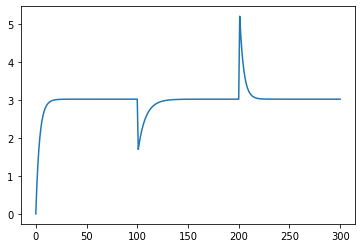

In [8]:
"""
Plot phosphorylated Che-Y (Yp) as a function of time
"""

plt.plot(s.getT(),s.getVarByName('Yp'))